In [1]:
!pip install pandas numpy scikit-learn imbalanced-learn tensorflow matplotlib seaborn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE


In [3]:
df = pd.read_csv("/content/creditcard.csv")  # Make sure this file is in your working directory
print(df.head())
print(df.isnull().sum())
print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
if 'Time' in df.columns and 'Amount' in df.columns:
    df['Hour'] = (df['Time'] // 3600) % 24
    df['Log_Amount'] = np.log1p(df['Amount'])
    df.drop(columns=['Time', 'Amount'], inplace=True)
else:
    print("Missing one or both columns: 'Time', 'Amount'. Available columns:", df.columns)

In [5]:
# Before splitting the data, drop rows with NaN values in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

# Now proceed with splitting the data
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# smote = SMOTE(random_state=42, k_neighbors=1)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Removed SMOTE as requested. The original X_train and y_train will be used.
X_train_resampled = X_train
y_train_resampled = y_train

In [8]:
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
input_layer = tf.keras.Input(shape=(X_train_resampled.shape[1], 1))
x = tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation="relu", name="conv1")(input_layer)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x = tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation="relu", name="conv2")(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [10]:
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9863 - loss: 0.1220 - precision: 0.0113 - recall: 0.0112 - val_accuracy: 0.9982 - val_loss: 0.0089 - val_precision: 0.6800 - val_recall: 0.3953
Epoch 2/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9985 - loss: 0.0108 - precision: 0.8017 - recall: 0.5246 - val_accuracy: 0.9984 - val_loss: 0.0074 - val_precision: 0.7241 - val_recall: 0.4884
Epoch 3/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9989 - loss: 0.0073 - precision: 0.8373 - recall: 0.6512 - val_accuracy: 0.9988 - val_loss: 0.0061 - val_precision: 0.7778 - val_recall: 0.6512
Epoch 4/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9989 - loss: 0.0046 - precision: 0.7450 - recall: 0.5977 - val_accuracy: 0.9988 - val_loss: 0.0056 - val_precision: 0.7632 - val_recall: 0.6744
Epoch 5/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9990 - loss: 0.0049 - precision: 0.8086 - recall: 0.7081 - val_accuracy: 0.9988 - 

In [11]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 99.93%
Precision: 96.77%
Recall: 69.77%
F1 Score: 81.08%
Confusion Matrix:
 [[18989     1]
 [   13    30]]


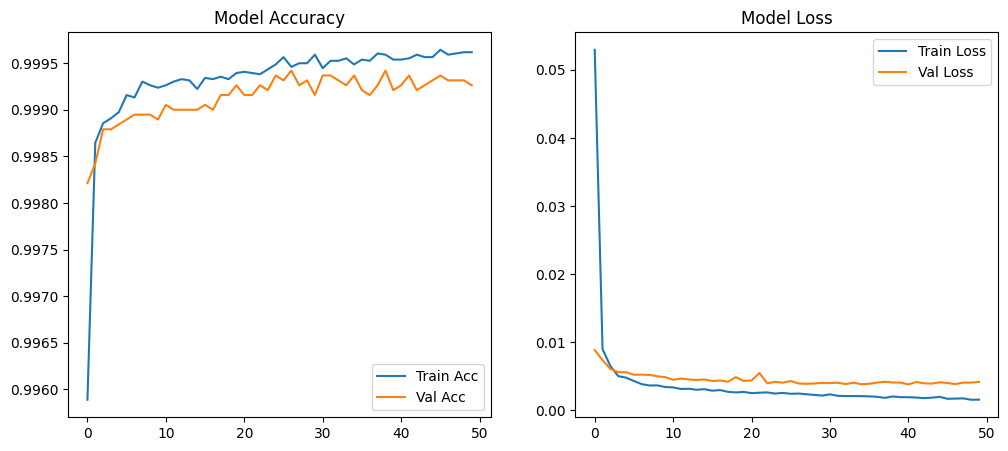

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.legend()
plt.show()


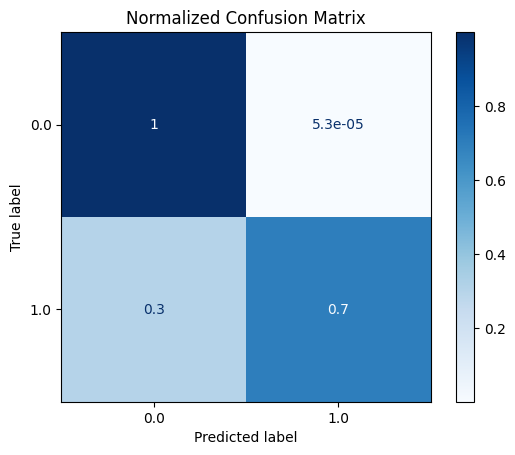

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap=plt.cm.Blues,
    normalize='true'
)
disp.ax_.set_title("Normalized Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


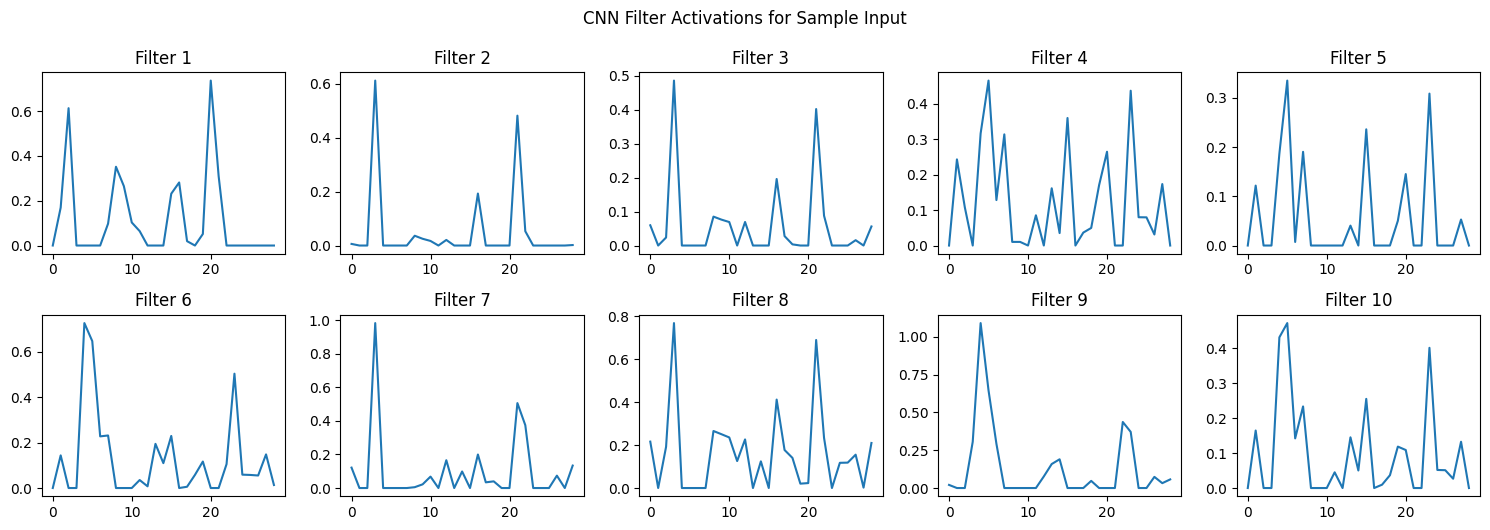

In [14]:
import keras

# Get outputs from conv layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

# Use first test sample
sample_input = np.expand_dims(X_test[0], axis=0)
activations = activation_model.predict(sample_input)

# Visualize feature maps from first conv layer
first_layer_activation = activations[0]
num_filters = first_layer_activation.shape[-1]

plt.figure(figsize=(15, 5))
for i in range(min(num_filters, 10)):
    plt.subplot(2, 5, i+1)
    plt.plot(first_layer_activation[0, :, i])
    plt.title(f"Filter {i+1}")
plt.tight_layout()
plt.suptitle("CNN Filter Activations for Sample Input", y=1.05)
plt.show()


In [15]:
print(f"Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Training Recall: {history.history['recall'][-1] * 100:.2f}%")
print(f"Validation Recall: {history.history['val_recall'][-1] * 100:.2f}%")

Training Accuracy: 99.96%
Validation Accuracy: 99.93%
Training Loss: 0.0016
Validation Loss: 0.0042
Training Recall: 87.93%
Validation Recall: 69.77%
